<a href="https://colab.research.google.com/github/nk755799/IDS/blob/main/HW5/HW5_project1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project5 (HW5)    
Naresh Kalluri (10755799)    
Github repository:https://github.com/nk755799/IDS/tree/main/HW5

In [ ]:
#Installing the Caret Package
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Importing the libraries
library(caret)
library(ggplot2)

In [ ]:
#Importing the Dataset from Professor Github Repository
CompanyDF <- read.csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv")

In [ ]:
#Gettting the First Part of the table.
head(CompanyDF)

,TV,Radio,Newspaper,Sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,12.0
4,151.5,41.3,58.5,16.5
5,180.8,10.8,58.4,17.9
6,8.7,48.9,75.0,7.2


In [ ]:
# producing result summaries of the result of model fitting functions
summary(CompanyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

**Examing Correlations**

In [ ]:
#Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = cor(CompanyDF, method = "pearson")
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


**Examing Features with Boxplots**

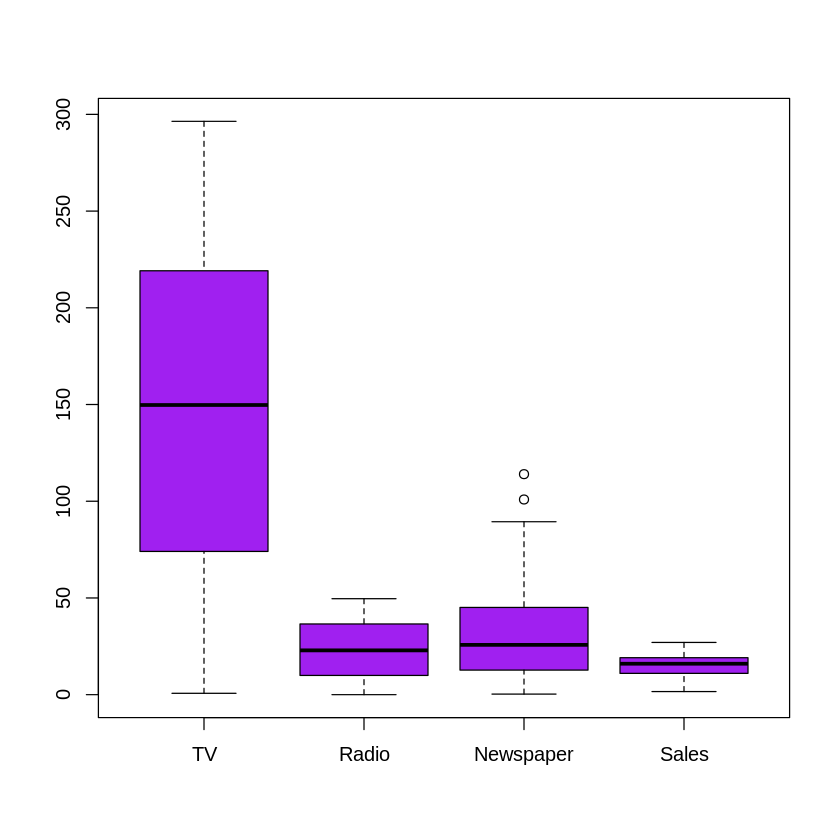

In [ ]:
#Plotting the dataset
boxplot(CompanyDF,col="purple")


**Examing Feature Distributions**

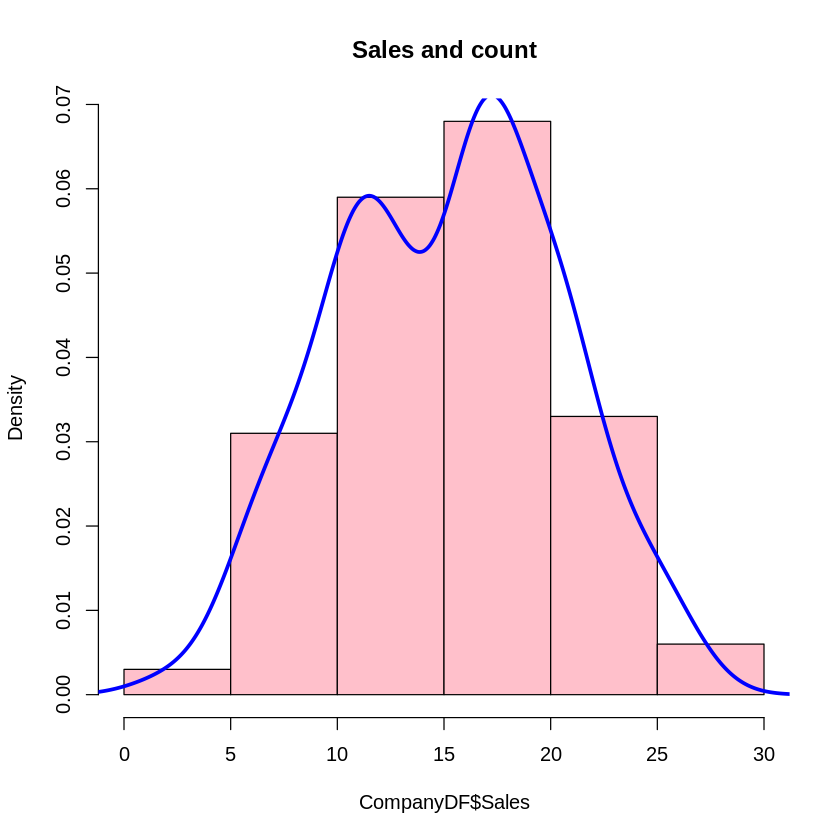

In [ ]:
# Creating Histogram for sales and count
hist(CompanyDF$Sales, freq = FALSE, main = "Sales and count", col = "pink")
dx <- density(CompanyDF$Sales)
lines(dx, lwd = 3, col = "blue")


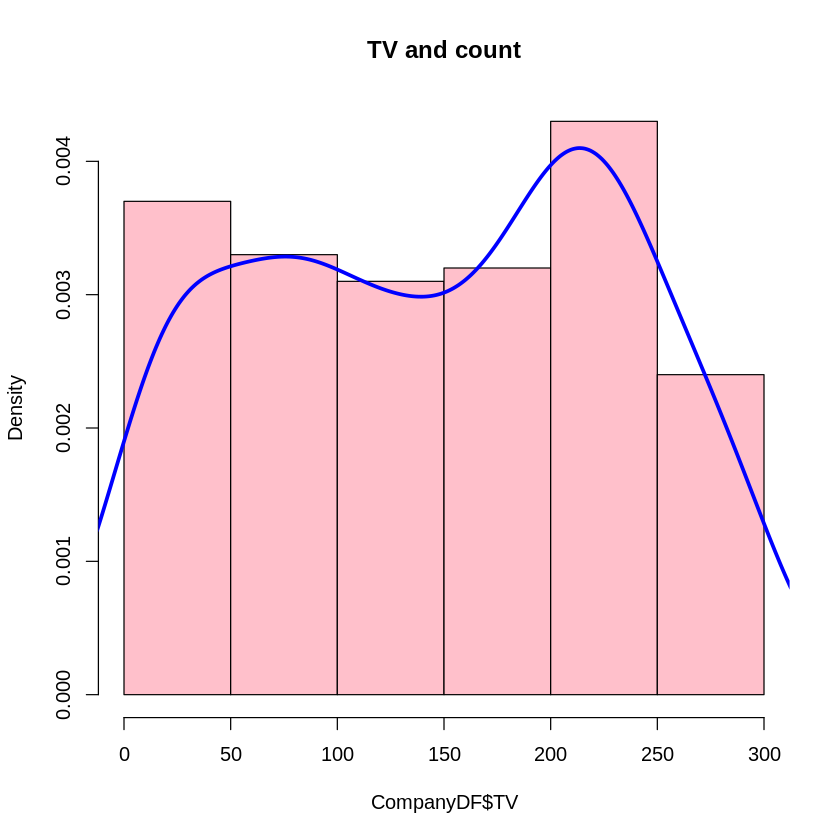

In [ ]:
# Creating a Histogram for TV and count
hist(CompanyDF$TV, freq = FALSE, main = "TV and count", col="pink")
dx <- density(CompanyDF$TV)
lines(dx, lwd = 3, col = "blue")

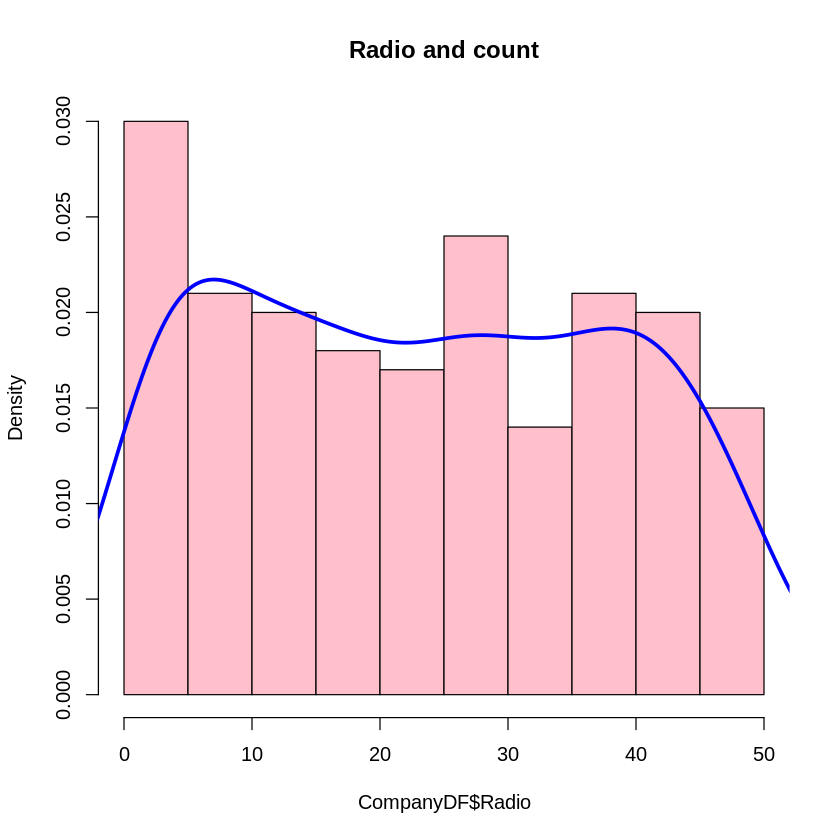

In [ ]:
# Creating a Histogram for radio and count
hist(CompanyDF$Radio, freq = FALSE, main = "Radio and count", col="pink")
dx <- density(CompanyDF$Radio)
lines(dx, lwd = 3, col = "blue")

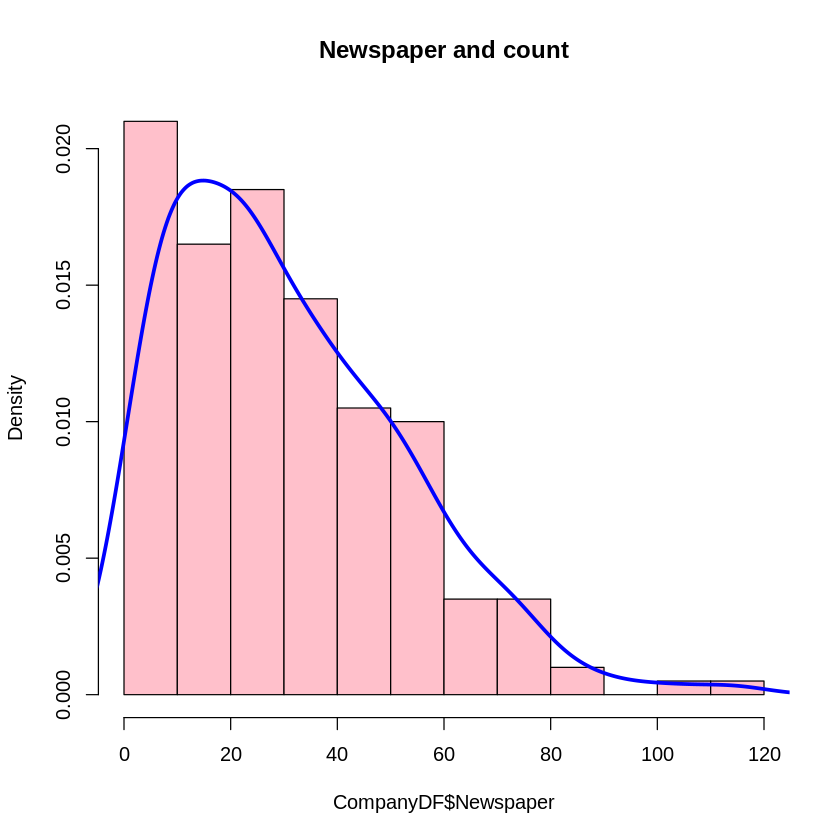

In [ ]:
# Creating a Histogram for Newspaper and count
hist(CompanyDF$Newspaper, freq = FALSE, main = "Newspaper and count", col="pink")
dx <- density(CompanyDF$Newspaper)
lines(dx, lwd = 3, col = "blue")

**Checking for any Missing value**

In [ ]:
# checking for any missing value
sum(is.na(CompanyDF))

[1] 0

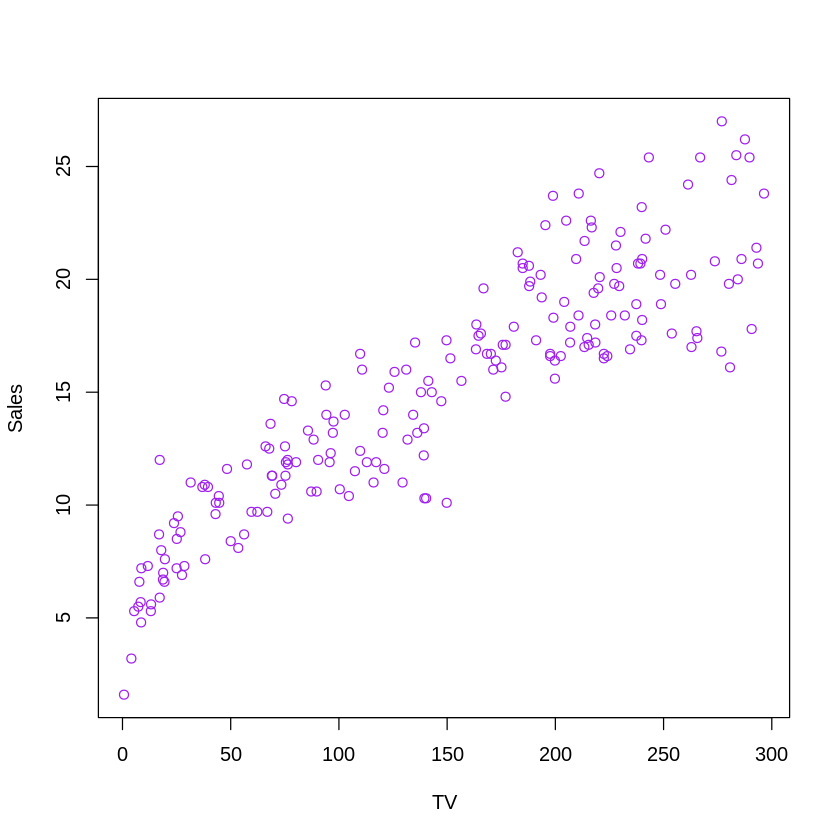

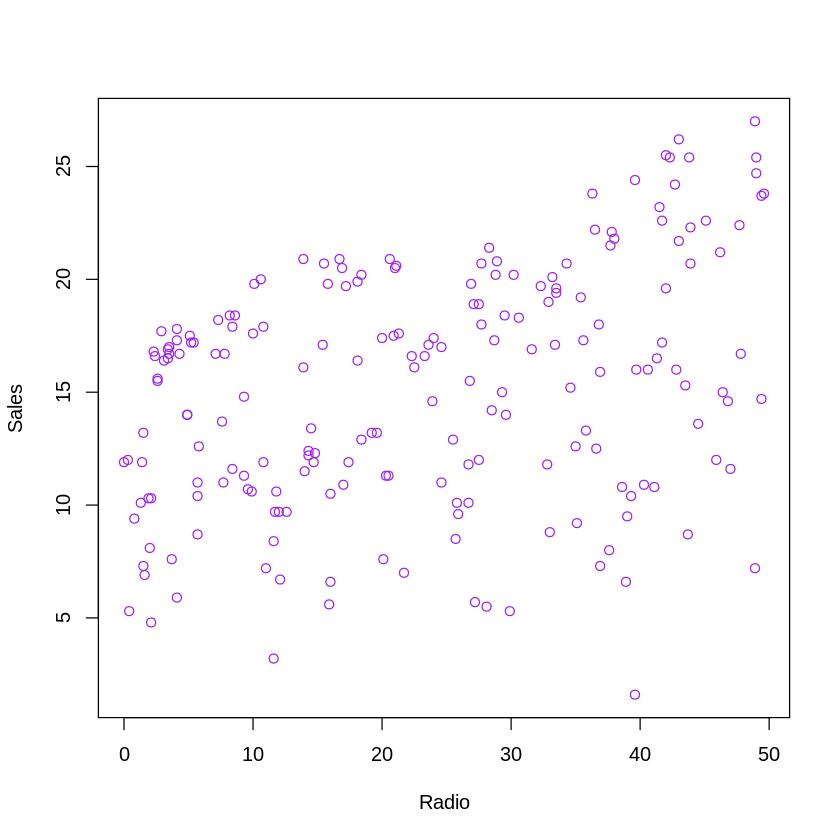

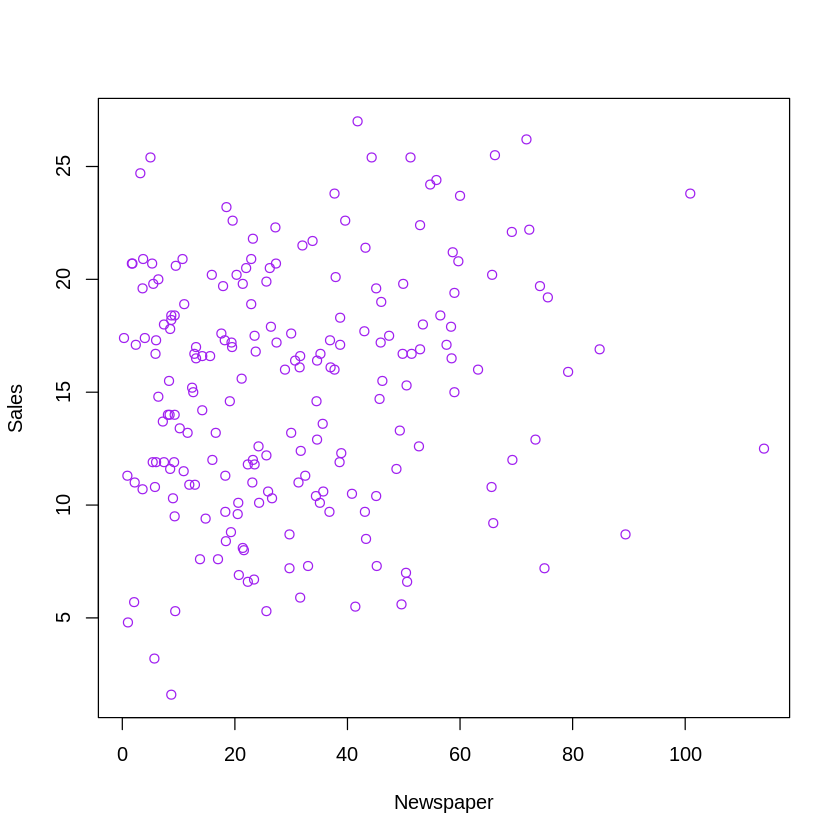

In [ ]:
plot(x= CompanyDF$TV, y= CompanyDF$Sales, col = "purple",xlab='TV',ylab='Sales')

plot(x= CompanyDF$Radio, y= CompanyDF$Sales, col = "purple",xlab='Radio',ylab='Sales')

plot(x= CompanyDF$Newspaper, y= CompanyDF$Sales, col = "purple",xlab='Newspaper',ylab='Sales')

**Using the Entire Dataset for Training**

**For Sales vs TV**

In [ ]:
# To find intercept and slope 
lm1 <- lm(CompanyDF$Sales ~ CompanyDF$TV)
lm1$coefficients


(Intercept) CompanyDF$TV 
  6.97482149   0.05546477

**Calculating R2**

In [ ]:
#R2 sqaured
summary(lm1)$r.squared

[1] 0.8121757

**Calculating MSE**

In [ ]:
mean(lm1$residuals^2)

[1] 5.217744

**For Sales vs TV, radio and newspaper**

In [ ]:
# To find intercept and slope
xy <-CompanyDF$TV+CompanyDF$Radio+CompanyDF$Newspaper 
lm2 <- lm(CompanyDF$Sales ~ (xy))
lm2$coefficients
#R2 sqaured
summary(lm2)$r.squared
mean(lm2$residuals^2)

(Intercept)          xy 
  4.5735730   0.0525585

[1] 0.8554715

[1] 4.014991

**Splitting the Given Data**


In [ ]:
set.seed(100)
dt <- createDataPartition(y=CompanyDF$Sales, p = 0.7,list = FALSE,)
train<-CompanyDF[dt,]
test<-CompanyDF[-dt,]
dim(train)
dim(test)

[1] 141   4

[1] 59  4

**Linear model for Sales vs TV**

In [ ]:
trainY=train$Sales
trainX =train$TV

#lm2 <- lm(Sales ~ TV, data = train,)   # also valid
lm3 <- lm(trainY ~ trainX)
lm3$coefficients
# R2 sqaured
summary(lm3)$r.squared
# MSE
mean(lm3$residuals^2)

(Intercept)      trainX 
 7.36682925  0.05237281

[1] 0.798559

[1] 4.917769

**Linear Model For Sales vs. (TV, Radio, Newspaper)**

In [ ]:
# To find intercept and slope
xy <-train$TV+train$Radio+train$Newspaper 
lm4 <- lm(train$Sales ~ xy)
lm4$coefficients
#R2 sqaured
summary(lm4)$r.squared
mean(lm4$residuals^2)

(Intercept)          xy 
 4.90837583  0.05068199

[1] 0.8366219

[1] 3.988541

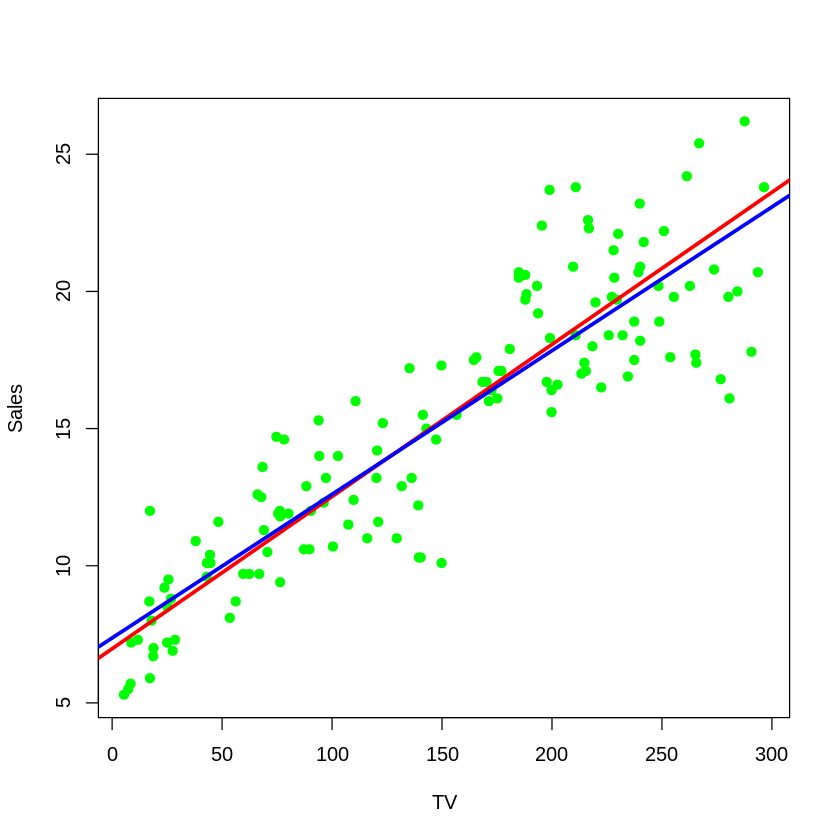

In [ ]:
plot(Sales ~ TV,data = train, pch = 19,col="green")
abline(lm1, col="red",lw=3)
abline(lm3, col="blue",lw=3)


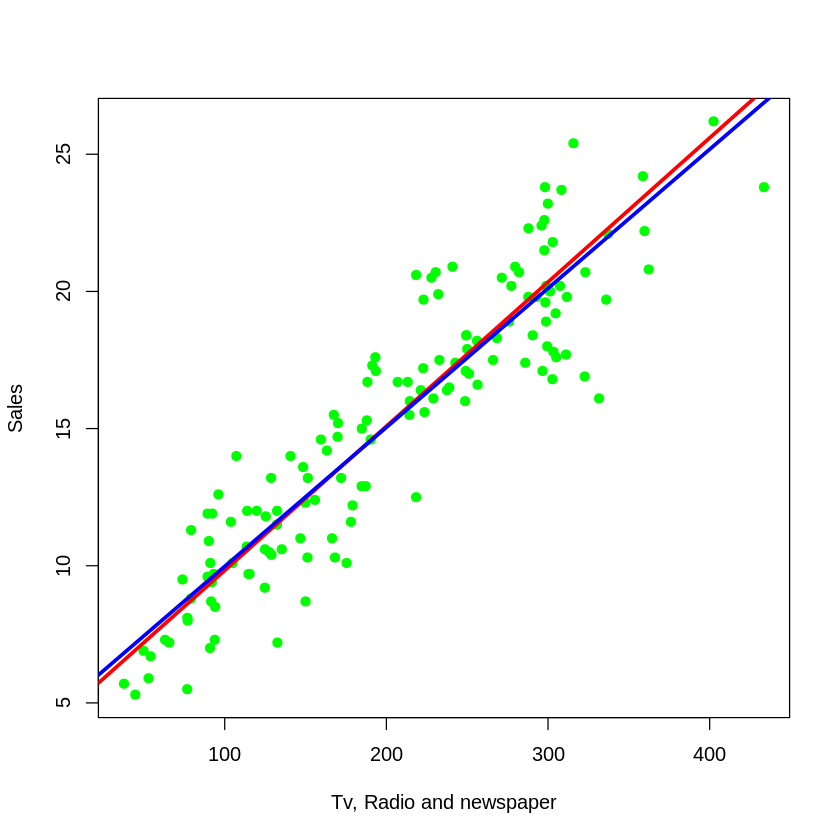

In [ ]:
plot(Sales ~ xy,data = train, pch = 19,col="green",xlab = "Tv, Radio and newspaper")
abline(lm2, col="red",lw=3)
abline(lm4, col="blue",lw=3)

**Summary of my Findings:**



*  For finding the Null values it clearly shows that there are no null values in the dataset
* After all data analysis it is clear that Tv sales are high.
* Found the Intercelpt and slope for the both sales vs Tv and Sales Vs Tv,Radio and Newspaper.
* And plotted those two.



